**Introduction**

The dataset used here provides a comprehensive overall view of transactions from an online retail store. Each entry details a customer's purchase, including the invoice number, product information (code and description), quantity, purchase date and time, unit price, customer ID, and the customer's country. This rich dataset allows for insightful analysis of customer behavior, product performance, and overall sales trends. It can be utilized for various data analysis tasks such as market basket analysis to identify products frequently bought together, customer segmentation based on purchase history, sales forecasting using historical trends, and even fraud detection by identifying unusual transactions. Through exploring and analyzing this data, we can gain valuable insights into the retail business and answer key business questions. This an ecommerce dataset which is taken from Keggle and to we have formulated 6 business questions for understanding how this dataset will be useful in world of business



In [ ]:
import pandas as datapd
import numpy as datanp
import sklearn.model_selection
import sklearn.preprocessing
import sklearn.compose
import sklearn.svm
import sklearn.metrics
import sklearn.tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as dataplt
import seaborn as datasns
from sklearn.preprocessing import OneHotEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import HuberRegressor
from scipy.stats.mstats import winsorize
import calendar


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Sales_dataset = datapd.read_csv("/content/drive/MyDrive/AI application/data-2.csv")
display(Sales_dataset.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df_train, df_test = sklearn.model_selection.train_test_split(Sales_dataset)
print("df-size",Sales_dataset.shape)
print("df_train-size",df_train.shape)
print("df_test-size",df_test.shape)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


df-size (541909, 8)
df_train-size (406431, 8)
df_test-size (135478, 8)


In [ ]:
df = df_train.copy()
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(406431, 8)

In [ ]:
df.describe().T.sort_values(by='std',ascending = False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count,mean,std,min,25%,50%,75%,max
CustomerID,304903.0,15287.712108,1713.560323,12346.00,13953.00,15152.00,16791.00,18287.0
Quantity,406431.0,9.525204,250.652976,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,406431.0,4.636483,103.858934,-11062.06,1.25,2.08,4.13,38970.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406431 entries, 237833 to 106961
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406431 non-null  object 
 1   StockCode    406431 non-null  object 
 2   Description  405346 non-null  object 
 3   Quantity     406431 non-null  int64  
 4   InvoiceDate  406431 non-null  object 
 5   UnitPrice    406431 non-null  float64
 6   CustomerID   304903 non-null  float64
 7   Country      406431 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dateFormat = '%m/%d/%Y %H:%M'
df['InvoiceDate'] = datapd.to_datetime(df['InvoiceDate'], format=dateFormat)
df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
Index: 406431 entries, 237833 to 106961
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406431 non-null  object        
 1   StockCode    406431 non-null  object        
 2   Description  405346 non-null  object        
 3   Quantity     406431 non-null  int64         
 4   InvoiceDate  406431 non-null  datetime64[ns]
 5   UnitPrice    406431 non-null  float64       
 6   CustomerID   304903 non-null  float64       
 7   Country      406431 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [ ]:
from functools import update_wrapper
df["Month"] = df["InvoiceDate"].dt.month
df["Year"] = df["InvoiceDate"].dt.year
df["Day"] = df["InvoiceDate"].dt.day
df["Hour"] = df["InvoiceDate"].dt.hour
df['DayName'] = df['InvoiceDate'].dt.day_name()
df["Quantity"] = df["Quantity"].astype(float)
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df["Transaction_profit"] = df["UnitPrice"] * df["Quantity"]
df['Country'] = df['Country'].str.upper()
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Day,Hour,DayName,TotalPrice,Transaction_profit
237833,557886,23201,JUMBO BAG ALPHABET,6.0,2011-06-23 13:39:00,2.08,17799.0,UNITED KINGDOM,6,2011,23,13,Thursday,12.48,12.48
311205,564230,21672,WHITE SPOT RED CERAMIC DRAWER KNOB,9.0,2011-08-24 10:22:00,2.46,NaN,UNITED KINGDOM,8,2011,24,10,Wednesday,22.14,22.14
211262,555351,23207,LUNCH BAG ALPHABET DESIGN,20.0,2011-06-02 12:37:00,1.65,13408.0,UNITED KINGDOM,6,2011,2,12,Thursday,33.00,33.00
70965,542107,22489,PACK OF 12 TRADITIONAL CRAYONS,2.0,2011-01-25 13:38:00,0.42,16222.0,UNITED KINGDOM,1,2011,25,13,Tuesday,0.84,0.84
241185,558194,21977,PACK OF 60 PINK PAISLEY CAKE CASES,1.0,2011-06-27 12:28:00,0.55,14583.0,UNITED KINGDOM,6,2011,27,12,Monday,0.55,0.55


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


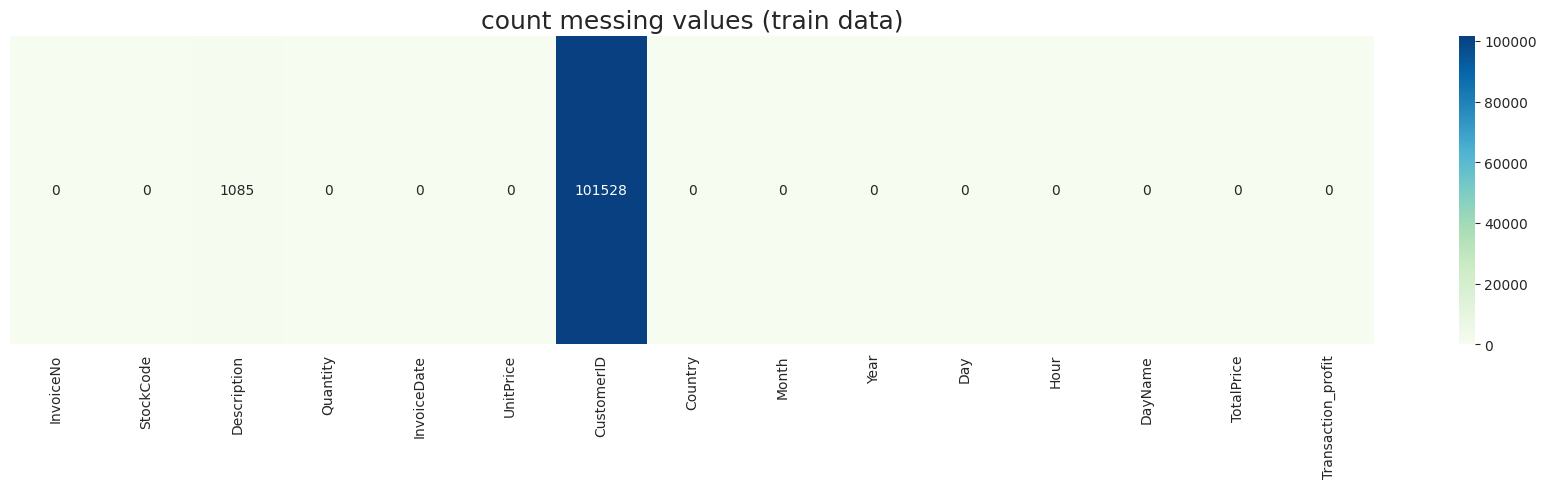

In [ ]:
completed_transactions = df[~df["InvoiceNo"].str.contains("C", regex=True)]
cancelled_transaction = df[df["InvoiceNo"].str.contains("C", regex=True)]
dataplt.figure(figsize=(22,4))
datasns.heatmap((df.isna().sum()).to_frame(name='').T, cmap='GnBu', annot=True, fmt='0.0f').set_title('count messing values (train data)', fontsize=18)
dataplt.show()

**Data cleaning**
Data cleaning is essential for accurate analysis. It involves fixing errors, inconsistencies, and missing values. Common tasks include: +Handling missing values: Deletion, imputation. +Detecting and handling outliers: Statistical methods, visualization. +Correcting inconsistencies: Standardizing formats, units, and values. +Removing duplicates: Identifying and eliminating redundant records. +Formatting data: Ensuring consistency and accuracy. +Imputing missing values: Using appropriate methods. +Transforming data: Normalizing numerical data, converting categorical data. +Tools: Python (Pandas, NumPy, Scikit-learn), R (dplyr, tidyr, caret), spreadsheets, specialized tools. We can get near to accurate results or we can get accurate results, efficient analysis, data quality, meaningful insights.



Checking for Noises

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


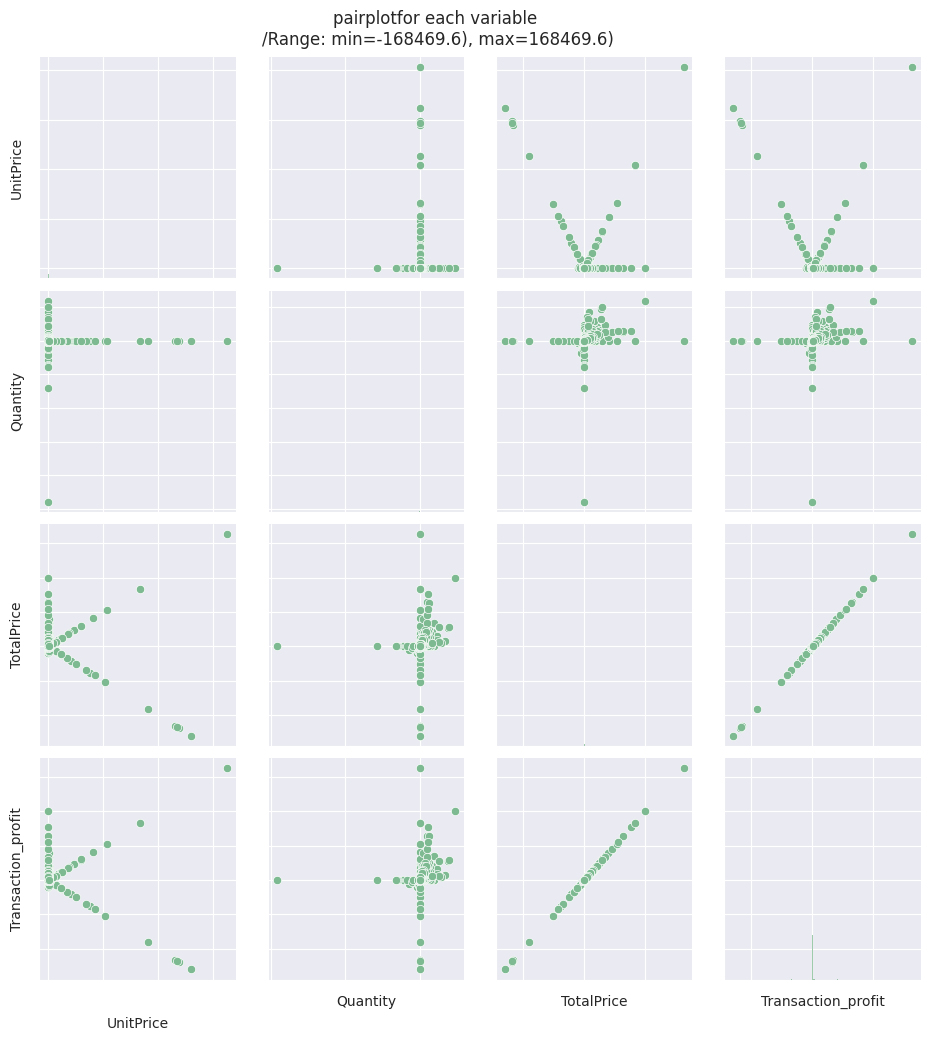

In [ ]:
numerical_columns = list(df.loc[:,['UnitPrice', 'Quantity', 'TotalPrice', 'Transaction_profit']])
sample_size = min(len(df),50000)
sampled_data = df.sample(sample_size, random_state=42)
datasns.set_palette('crest')
datasns.set_style('darkgrid')
dnp = datasns.pairplot(sampled_data.loc[:, numerical_columns])
dnp.set(xticklabels=[], yticklabels=[])
dnp.axes[0][0].set_ylabel(numerical_columns[0], fontsize=10)
dnp.axes[-1][0].set_xlabel(numerical_columns[0], fontsize=10)
dnp.axes[-1][0].xaxis.labelpad = 20
dnp.axes[-1][-1].yaxis.labelpad = 20

dnp.fig.suptitle('pairplotfor each variable \n/Range: min={}), max={})'.format(df[numerical_columns].min().min(), df[numerical_columns].max().max()), y =1.03,fontsize=12)
dataplt.show()

Business questions

Q1: Which product had the biggest share and the which countries is this product supplied to?

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


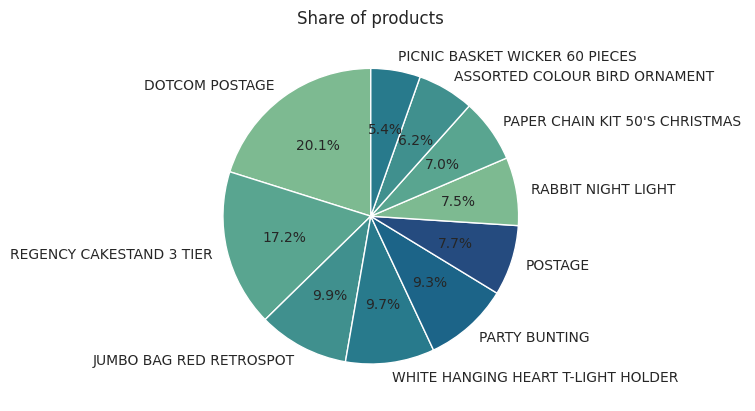

In [ ]:
product_share = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
dataplt.pie(product_share.values, labels=product_share.index, autopct='%1.1f%%', startangle=90)
dataplt.title('Share of products')
dataplt.show()

As it seen that "DOTCOM POSTAGE" has
the highest share as compared to other products in market of 20.8% in the above pie chart, we can say that "DOTCOM POSTAGE" has a large share in sales in the current market according to our dataset


To which country the highest share product is supplied to, can be analyzed using a histogram chart:

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


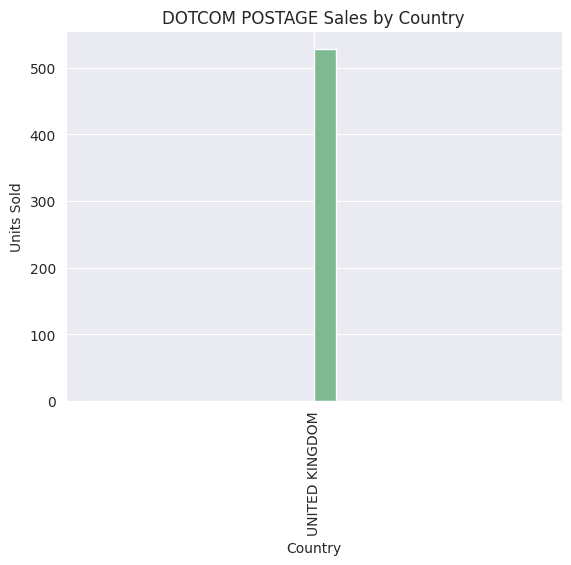

In [ ]:
dotcom_postage = df[df["Description"] == "DOTCOM POSTAGE"]
dataplt.hist(dotcom_postage["Country"], bins=20)
dataplt.xlabel("Country")
dataplt.ylabel("Units Sold")
dataplt.title("DOTCOM POSTAGE Sales by Country")
dataplt.xticks(rotation=90)
dataplt.show()

According to the generated histogram chart, we can see that "DOTCOM POSTAGE" has been sold to only United Kingdom and not other countries.

Q2 :How many customers purchased each month?

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


        month  CustomerID
0       April         886
1      August         965
2    December        1359
3    February         779
4     January         772
5        July         980
6        June        1036
7       March        1008
8         May        1069
9    November        1698
10    October        1407
11  September        1282


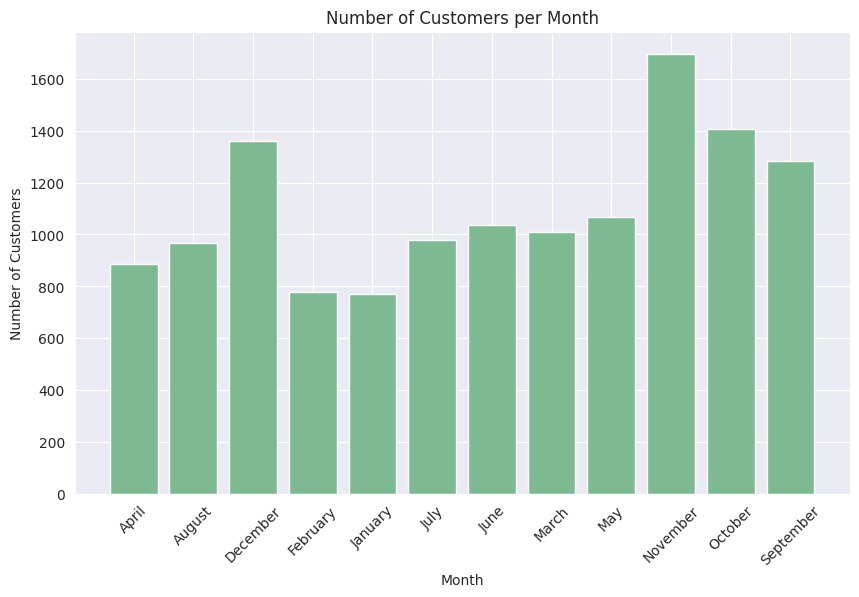

In [ ]:
df['month'] = datapd.to_datetime(df['InvoiceDate']).dt.month_name()

customers_per_month = df.groupby('month')['CustomerID'].nunique().reset_index()

print(customers_per_month)

dataplt.figure(figsize=(10, 6))
dataplt.bar(customers_per_month['month'], customers_per_month['CustomerID'])
dataplt.xlabel('Month')
dataplt.ylabel('Number of Customers')
dataplt.title('Number of Customers per Month')
dataplt.xticks(rotation=45)
dataplt.show()

Q3. Which product has the lowest sales and needs a push marketting strategy?


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


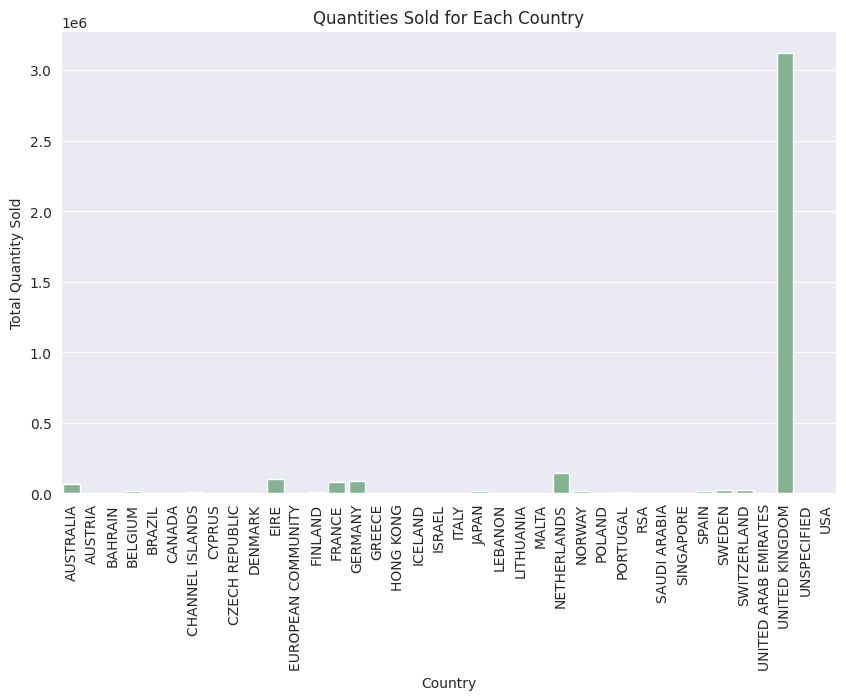

In [ ]:
dataplt.figure(figsize=(10, 6))
datasns.barplot(x=df.groupby('Country')['Quantity'].sum().index, y=df.groupby('Country')['Quantity'].sum().values)
dataplt.xlabel("Country")
dataplt.ylabel("Total Quantity Sold")
dataplt.title("Quantities Sold for Each Country")
dataplt.xticks(rotation=90)
dataplt.show()

The countries: Belgium, Norway, Portugal, Finland, Japan, Spain, Sweden and Switzerland have the lowest product sales according to the diagram.

Q4: which product is more popular in each countries?

In [ ]:
def most_popular_product(df):
    country_product = df.groupby('Country')['Description'].agg(lambda x: x.value_counts().index[0])
    return country_product

country_product = most_popular_product(df)
print(country_product)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Country
AUSTRALIA                           LUNCH BAG RED RETROSPOT
AUSTRIA                                             POSTAGE
BAHRAIN                  OCEAN SCENT CANDLE IN JEWELLED BOX
BELGIUM                                             POSTAGE
BRAZIL                          RECYCLED ACAPULCO MAT GREEN
CANADA                  BUNDLE OF 3 ALPHABET EXERCISE BOOKS
CHANNEL ISLANDS                     JUMBO BAG RED RETROSPOT
CYPRUS                             REGENCY CAKESTAND 3 TIER
CZECH REPUBLIC                    PINK METAL CHICKEN HEART 
DENMARK                                             POSTAGE
EIRE                                               CARRIAGE
EUROPEAN COMMUNITY                BISCUIT TIN VINTAGE GREEN
FINLAND                                             POSTAGE
FRANCE                                              POSTAGE
GERMANY                                             POSTAGE
GREECE                             SET OF 4 JAM JAR MAGNETS
HONG KONG                      M

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


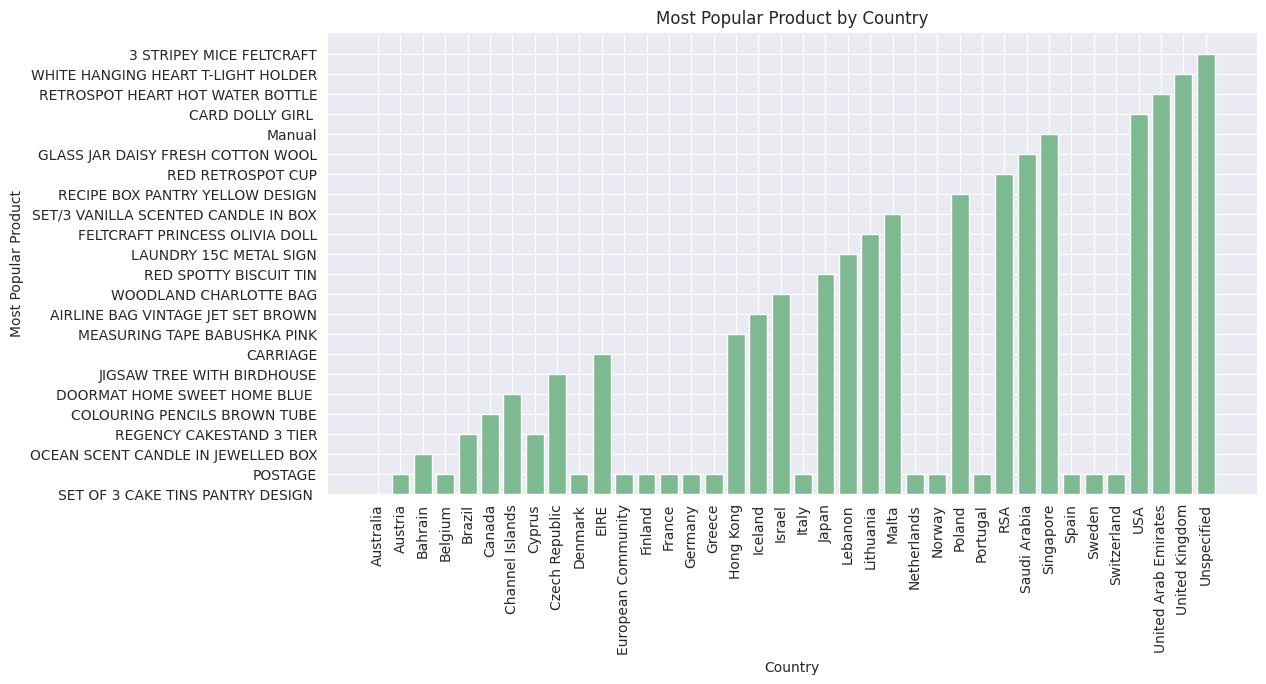

In [ ]:
df = datapd.read_csv('/content/drive/MyDrive/AI application/data-2.csv')
def most_popular_product(df):
    country_product = df.groupby('Country')['Description'].agg(lambda x: x.value_counts().index[0])
    return country_product

country_product = most_popular_product(df)

dataplt.figure(figsize=(12, 6))
dataplt.bar(country_product.index, country_product.values)
dataplt.xlabel("Country")
dataplt.ylabel("Most Popular Product")
dataplt.title("Most Popular Product by Country")
dataplt.xticks(rotation=90)
dataplt.show()

as we can see in the above graph: the product are displayed against the repective countries. For example CARRIAGE Product is famous in EIRE country

Q5: what is the monthly revenue trend overtime?

In [ ]:
df['MonthlyInvoiceDate'] = datapd.to_datetime(df['InvoiceDate'])
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_revenue = df.groupby('YearMonth')['TotalPrice'].sum()
print(monthly_revenue)

YearMonth
2010-12     560773.340
2011-01     404715.650
2011-02     374293.110
2011-03     504671.090
2011-04     356700.011
2011-05     558073.900
2011-06     515269.250
2011-07     500070.781
2011-08     514472.150
2011-09     758756.981
2011-10     814345.810
2011-11    1099995.520
2011-12     321618.900
Freq: M, Name: TotalPrice, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


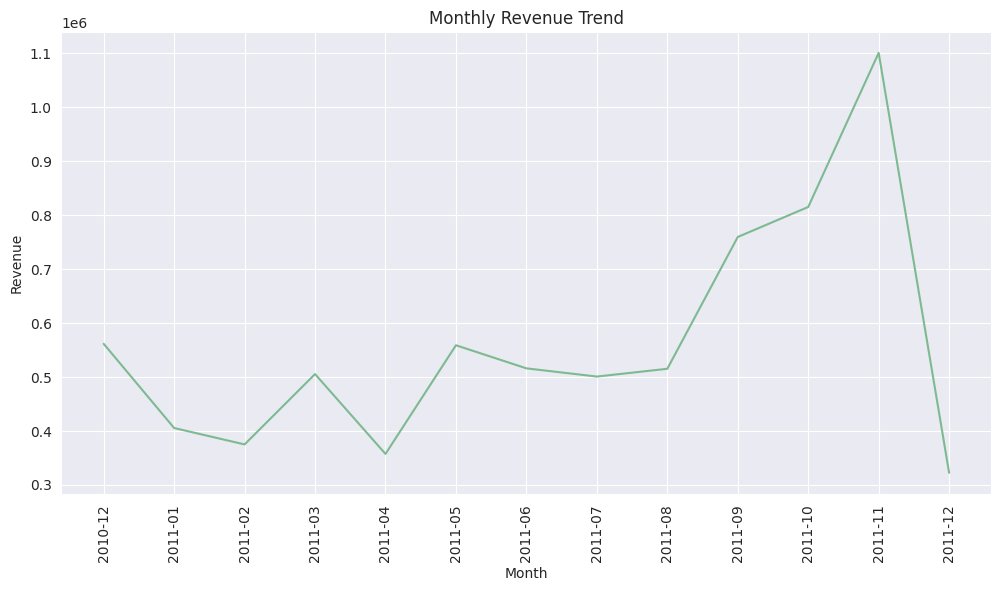

In [ ]:
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_revenue = df.groupby('YearMonth')['TotalPrice'].sum()

dataplt.figure(figsize=(12, 6))
dataplt.plot(monthly_revenue.index.astype(str), monthly_revenue.values)
dataplt.xlabel("Month")
dataplt.ylabel("Revenue")
dataplt.title("Monthly Revenue Trend")
dataplt.xticks(rotation=90)
dataplt.show()

as we can see in the graph we can see the seasonal trends of sales in the market according to this dataset.

Q6: Which product gives the highest revenue when sold in less quantity as compared to other products?


In [ ]:
product_revenue = df.groupby('Description')['TotalPrice'].sum()
product_quantity = df.groupby('Description')['Quantity'].sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Here, we have to calculate the revenue per qantity in order to display the result:

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


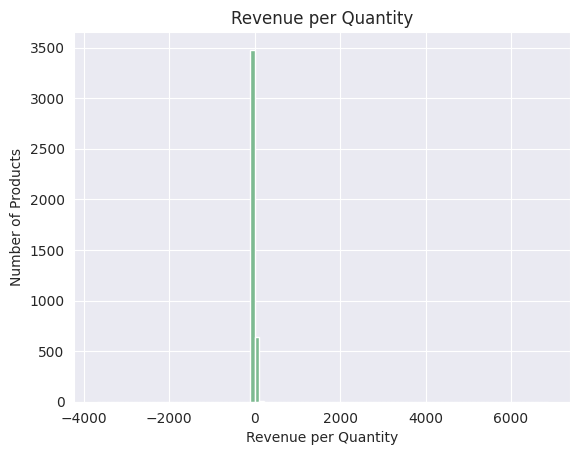

In [ ]:
product_revenue = df.groupby('Description')['TotalPrice'].sum()
product_quantity = df.groupby('Description')['Quantity'].sum()
product_quantity = product_quantity[product_quantity != 0]

revenue_per_quantity = product_revenue / product_quantity

dataplt.hist(revenue_per_quantity, bins=100)
dataplt.xlabel('Revenue per Quantity')
dataplt.ylabel('Number of Products')
dataplt.title('Revenue per Quantity')
dataplt.show()

We can identify the product with the highest revenue per quantity.

In [ ]:
highest_revenue_product = revenue_per_quantity.idxmax()
print(f'{highest_revenue_product=}')

highest_revenue_product='AMAZON FEE'


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The highest revenue product is AMAZON FEE

**Conclusion**

To conclude, the sales transaction dataset provides valuable insights into sales performance, customer behavior, and market trends. These findings can inform strategic decision-making, optimize marketing efforts, and improve overall business efficiency.



**Reference**
[https://www.kaggle.com/datasets/lissetteg/ecommerce-dataset](https://)